In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from sklearn.linear_model import LinearRegression


In [2]:
data=pd.read_csv("car_price_dataset.csv")
df=pd.DataFrame(data)
df1=df.iloc[: 1000, :]
df1.head(2)

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092


In [3]:
df2=df.loc[9000 :,["Mileage","Year"]]
dfPrice=df.loc[9000 :,["Price"]]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


In [5]:
# 1º Verificar variavéis independentes com correlação mais forte á variável dependente

for i in df1.select_dtypes(["number"]):
    pearson_coef,P_value=sp.stats.pearsonr(df[i],df["Price"])
    print(i," Pers.Coef=",pearson_coef,"; P_value=",P_value)

Year  Pers.Coef= 0.6630358185023514 ; P_value= 0.0
Engine_Size  Pers.Coef= 0.35740347535586653 ; P_value= 4.410791291545083e-299
Mileage  Pers.Coef= -0.5512271827629015 ; P_value= 0.0
Doors  Pers.Coef= 0.000511498817718859 ; P_value= 0.9592111805001801
Owner_Count  Pers.Coef= 0.0026563994065634425 ; P_value= 0.7905417381412357
Price  Pers.Coef= 1.0 ; P_value= 0.0


<Axes: xlabel='Price', ylabel='Mileage'>

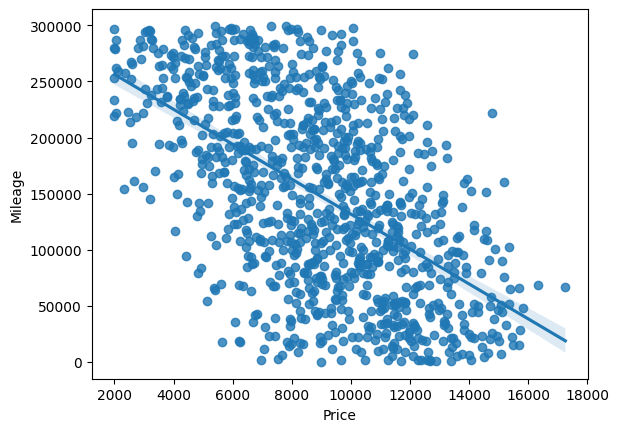

In [6]:
# Verificar no gráfico

sns.regplot(x=df1["Price"],y=df1["Mileage"])

<Axes: xlabel='Price', ylabel='Year'>

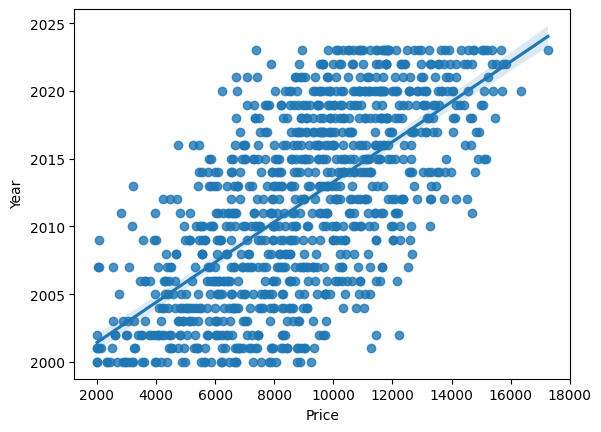

In [7]:
sns.regplot(x=df1["Price"],y=df1["Year"])

In [8]:
# 2º Desenvolver modelo preditivo com variáveis independentes com correlação mais forte

lm=LinearRegression()

In [9]:
lm.fit(df1[["Mileage","Year"]],df1[["Price"]])

LinearRegression()

In [10]:
yhat=lm.predict(df1[["Mileage","Year"]])

In [11]:
yhat

array([[ 8526.06554664],
       [11872.31031836],
       [ 9694.98736811],
       [11980.4278344 ],
       [ 3620.27180889],
       [ 7362.24409727],
       [ 8605.43723183],
       [ 5615.20527588],
       [10592.24854989],
       [ 7779.58066183],
       [ 6341.20555524],
       [10246.81597137],
       [ 7862.02890587],
       [ 5863.2643984 ],
       [ 6431.4264909 ],
       [ 9316.02826989],
       [12679.84504182],
       [ 9402.00811301],
       [ 3326.05841645],
       [13919.57657342],
       [13309.43620435],
       [ 7634.05001863],
       [ 6616.42319446],
       [ 8227.97135945],
       [12752.29828721],
       [ 9844.90412386],
       [13318.74684832],
       [10590.55512953],
       [10108.03811363],
       [ 9837.90099715],
       [ 6248.26783523],
       [ 9043.51324755],
       [ 9773.00516558],
       [10669.71682635],
       [ 8747.89608229],
       [ 9560.49611437],
       [ 7008.80409245],
       [ 5131.80926185],
       [ 7899.98097522],
       [ 7753.01201903],


Text(0, 0.5, 'Ind. variaveis')

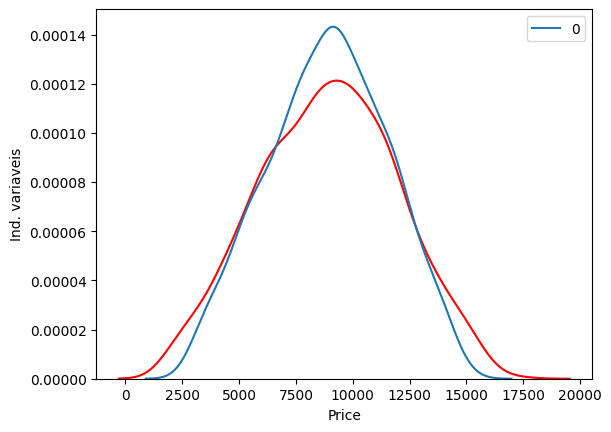

In [12]:
# 3º Avaliar se modelo é apropriado

sns.kdeplot(df1["Price"],color="r")
sns.kdeplot(yhat)
plt.ylabel("Ind. variaveis")

<Axes: ylabel='Price'>

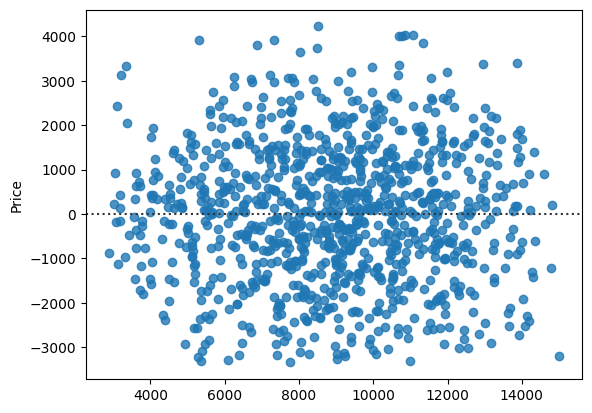

In [13]:
sns.residplot(x=yhat,y=df1["Price"]) # Este seria um modelo apropriado, verificação feita sobre os valores usados no treinamento

In [14]:
yhat2=lm.predict(df2)  # Prever preço de carros com "Mileage" e "Year" com amostras diferentes das usadas no treinamento

Text(0, 0.5, 'var. Independentes')

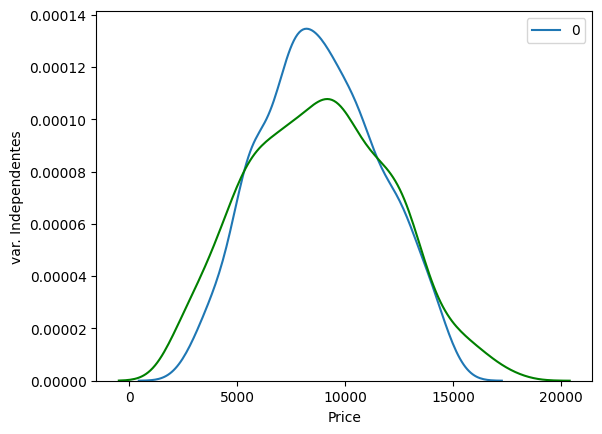

In [15]:
# Gráfico de distribuição não dá tão certo como o primeiro, como era de esperar

sns.kdeplot(yhat2)
sns.kdeplot(dfPrice["Price"],color="green")
plt.ylabel("var. Independentes")